# Le but du projet est de savoir si un pokemon est légendaire ou non... Malgré le côté fun on va faire un projet sérieux sur un objet qui lui est plutôt léger

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
pokemon = pd.read_csv('/content/Pokemon Data.csv')
pokemon 

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [11]:
pokemon.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [12]:
pokemon['Type_2'].fillna(pokemon['Type_2'].max, inplace = True)
pokemon['Pr_Male'].fillna(pokemon['Pr_Male'].max, inplace = True)
pokemon['Egg_Group_2'].fillna(pokemon['Egg_Group_2'].max, inplace = True)

In [14]:
pokemon.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,14.500000,950.000000,255.000000


On va faire une heatmap pour voir la corrélation entre chacune des valeurs 

Une heatmap est une représentation graphique d'une matrice dans laquelle les valeurs sont représentées par des couleurs. Dans le cas de la corrélation, la matrice contient les coefficients de corrélation par paires entre toutes les paires de variables dans le jeu de données. La heatmap vous permet d'identifier rapidement les paires de variables qui sont fortement corrélées et celles qui ne le sont pas.

<Axes: >

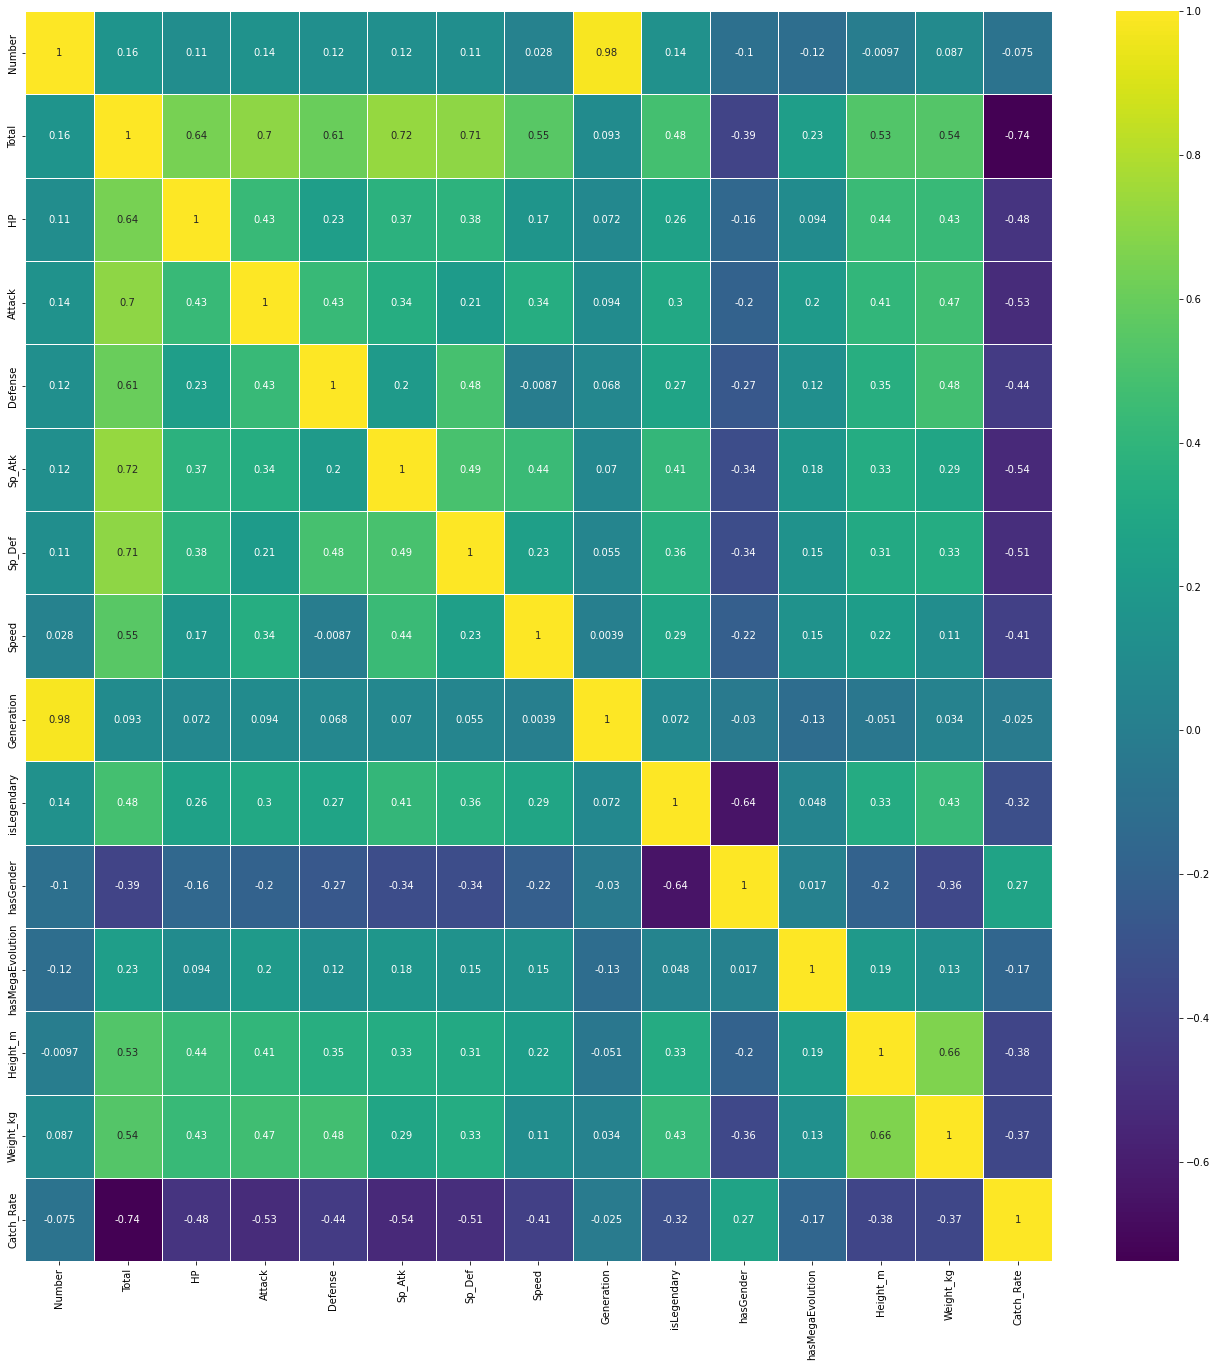

In [22]:
plt.figure(figsize=(23,23))
sns.heatmap(pokemon.corr(),annot=True, cmap='viridis', linewidths=.5)

In [17]:
pokemon['Type_1'].value_counts()

Water       105
Normal       93
Grass        66
Bug          63
Fire         47
Psychic      47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ghost        23
Ice          23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

In [18]:
pokemon['Generation'].value_counts()

5    156
1    151
3    135
4    107
2    100
6     72
Name: Generation, dtype: int64

In [19]:
pokemon['Color'].value_counts()

Blue      134
Brown     110
Green      79
Red        75
Grey       69
Purple     65
Yellow     64
White      52
Pink       41
Black      32
Name: Color, dtype: int64

In [20]:
pokemon['Egg_Group_1'].value_counts()

Field           169
Monster          74
Water_1          74
Undiscovered     73
Bug              66
Mineral          46
Flying           44
Amorphous        41
Human-Like       37
Fairy            30
Grass            27
Water_2          15
Water_3          14
Dragon           10
Ditto             1
Name: Egg_Group_1, dtype: int64

In [21]:
pokemon['Body_Style'].value_counts()

bipedal_tailed      158
quadruped           135
bipedal_tailless    109
two_wings            63
head_arms            39
head_only            34
with_fins            31
insectoid            30
head_base            30
serpentine_body      29
four_wings           18
head_legs            17
multiple_bodies      15
several_limbs        13
Name: Body_Style, dtype: int64

Un autre moyen de faire du feature engineering c'est de rassembler certaines valeurs catégoriques voire d'en créer de nouvelles à partir d'autres. Ci dessous :

In [23]:
pokemon_type = pokemon.replace(['Water', 'Ice'], 'Water')

In [39]:
pokemon_type = pokemon_type.replace(['Grass','Bug'], 'Grass')

In [40]:
pokemon_type = pokemon_type.replace(['Ground', 'Rock'], 'Rock')
pokemon_type = pokemon_type.replace(['Psychic', 'Dark', 'Ghost', 'Fairy'], 'Dark')
pokemon_type = pokemon_type.replace(['Electric', 'Steel'], 'Electric')

la fonction replace permet de viser ces catégories là pour les remplacer comme on l'a fait

In [41]:
pokemon_type['Type_1'].value_counts()

Grass       129
Dark        115
Water       105
Normal       93
Rock         71
Electric     58
Fire         47
Poison       28
Fighting     25
Dragon       24
Ice          23
Flying        3
Name: Type_1, dtype: int64

In [46]:
import sys

print(sys.getrecursionlimit()) # Prints 1000
sys.setrecursionlimit(2500)

1500


In [49]:
ref1 = dict(pokemon_type['Body_Style'].value_counts())
pokemon_type['Body_Style_new']= pokemon_type['Body_Style'].map(ref1)

Les deux lignes ci dessus permettent de remplacer les valeurs de la colonnes Body Style, en integers qui valent le nbr de fois que la valeur a été iterrée dans la colonne. 

La suite va être l'encodage où on va procéder avec get_dummies() qui va nous permettre de récupérer des 0 et des 1 à partir de données catégoriques.

In [50]:
types_pokemon = pd.get_dummies(pokemon_type['Type_1'])
color_pokemon = pd.get_dummies(pokemon_type['Color'])

X = pd.concat([pokemon_type, types_pokemon], axis=1)
X = pd.concat([X, color_pokemon], axis = 1)

In [53]:
X.head(n=2)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,0,0,1,0,0,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,0,0,1,0,0,0,0,0,0


In [54]:
X.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style',
       'Body_Style_new', 'Dark', 'Dragon', 'Electric', 'Fighting', 'Fire',
       'Flying', 'Grass', 'Ice', 'Normal', 'Poison', 'Rock', 'Water', 'Black',
       'Blue', 'Brown', 'Green', 'Grey', 'Pink', 'Purple', 'Red', 'White',
       'Yellow'],
      dtype='object')

In [55]:
X_ = X.drop(['Number', 'Name', 'Type_1', 'Color', 'Egg_Group_1'], axis=1)

X_.shape

(721, 41)

In [56]:
X.shape

(721, 46)

Le feature engineering est terminé on peut passer à la création du model et son training

In [80]:
y = X_['isLegendary']
X_final = X_.drop(['isLegendary', 'Body_Style', 'Type_2', 'Egg_Group_2','Pr_Male'], axis=1)


In [81]:
X_final.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'hasGender', 'hasMegaEvolution', 'Height_m', 'Weight_kg',
       'Catch_Rate', 'Body_Style_new', 'Dark', 'Dragon', 'Electric',
       'Fighting', 'Fire', 'Flying', 'Grass', 'Ice', 'Normal', 'Poison',
       'Rock', 'Water', 'Black', 'Blue', 'Brown', 'Green', 'Grey', 'Pink',
       'Purple', 'Red', 'White', 'Yellow'],
      dtype='object')

In [82]:
X_final.head(n=2)

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,hasMegaEvolution,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,318,45,49,49,65,65,45,1,True,False,...,0,0,0,1,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,True,False,...,0,0,0,1,0,0,0,0,0,0


In [84]:
train_X, val_X, train_y, val_y = train_test_split (X_final, y, test_size=0.2)

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
random_forest = RandomForestClassifier(n_estimators=500, random_state=42)

In [87]:
print(train_X.dtypes)

Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
hasGender              bool
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style_new        int64
Dark                  uint8
Dragon                uint8
Electric              uint8
Fighting              uint8
Fire                  uint8
Flying                uint8
Grass                 uint8
Ice                   uint8
Normal                uint8
Poison                uint8
Rock                  uint8
Water                 uint8
Black                 uint8
Blue                  uint8
Brown                 uint8
Green                 uint8
Grey                  uint8
Pink                  uint8
Purple                uint8
Red                   uint8
White                 uint8
Yellow              

In [88]:
print(train_y.dtypes)

bool


In [89]:
model_final= random_forest.fit(train_X, train_y)

y_pred= model_final.predict(val_X)

#On va calculer la précision du model sur les données de training

model_accuracy = round(model_final.score(train_X, train_y)*100,2)
print(round(model_accuracy, 2), '%')

100.0 %


In [90]:
model_accuracy_1= round(model_final.score(val_X, val_y)*100,2)
print(round(model_accuracy_1, 2), '%')

97.93 %


Maintenant je vais télécharger le model pour le déployer sur application.

In [93]:
import pickle

filename = 'pokemon_model.pickle'

pickle.dump(model_final, open(filename, 'wb'))